In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
np.random.seed(1)

# MNIST Dataset

In [2]:
mnist = tf.keras.datasets.mnist  
(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1)[:200]
X_test = tf.keras.utils.normalize(X_test, axis=1)[:200]

encoder = OneHotEncoder(sparse=False,categories='auto')
y_test = encoder.fit_transform(y_test.reshape(-1,1))[:200]
y_train = encoder.fit_transform(y_train.reshape(-1,1))[:200]

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 28, 28)
(200, 10)
(200, 28, 28)
(200, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


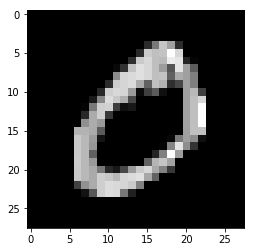

In [4]:
plt.imshow(X_train[1],cmap='gray')
print(y_train[1])

# CNN Dimensions

In [5]:
# Input   =    28x28 image
# Conv1   =    26x26 image with 3x3 filter
# Maxpool =    13x13 image with stride 2 3x3 filter
# Output   =    10x1

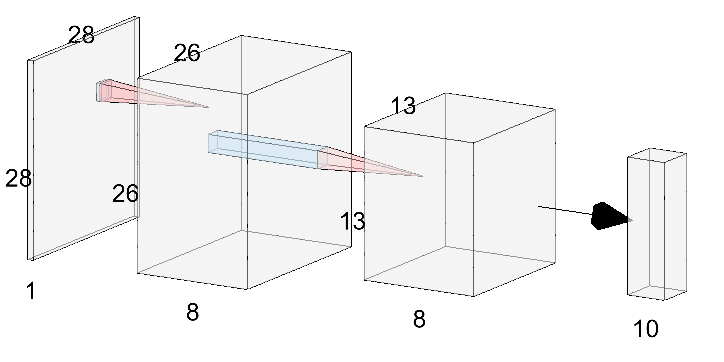

In [6]:
class Dimensions():
    
    def __init__(self):
        self.convFSize = [8,3,3]
        self.maxpoolFSize = [8,2,2]
        
        
    def outputSize(self,inputSize,fsize,padding,stride):
        
        wh = int(((inputSize[1]-fsize[1]+padding)/stride)+1)
        depth = fsize[0]

        return np.array([depth,wh,wh])
    
    
    def dimensions(self):
        
        inputSize = np.array([X_test.shape[0],X_test.shape[1],X_test.shape[2]])
        convSize = self.outputSize(inputSize,self.convFSize,0,1)
        maxpoolSize = self.outputSize(convSize,self.maxpoolFSize,0,2)
        outputSize = np.array([y_test.shape[1],1])
        
        return self.convFSize,self.maxpoolFSize,inputSize,convSize,maxpoolSize,outputSize

# Network

In [7]:
class Network():
    
    def __init__(self,X_train,y_train,X_test,y_test):
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        

        dimensions = Dimensions()
        self.convFSize,self.maxpoolFSize,self.inputSize,self.convSize,self.maxpoolSize,self.outputSize = dimensions.dimensions()
        
        # Conv Filters
        self.convFilter = np.random.randn(self.convFSize[0],self.convFSize[1],self.convFSize[2])
        self.weights = np.random.randn(np.prod(self.maxpoolSize),self.outputSize[0])
        
        # Layers
       
        self.outputLayer = np.zeros([self.outputSize[0],self.outputSize[1]])
        self.predictions = []
        self.activated_predictions = []
        self.losses = []
        
        
    def size(self):
        print('InputSize: {} \nConvolution Size: {} \nMaxpool Size: {} \nDense Size: {}\nOutput Size: {}'.format(self.inputSize,self.convSize,self.maxpoolSize,np.array(self.weights.shape),self.outputSize))
    
    
    def convolve(self,image):
        
        output = np.zeros([self.convSize[0],self.convSize[1],self.convSize[2]])

        for filternum in range(self.convSize[0]):
            for row in range(self.convSize[1]):
                for column in range(self.convSize[2]):
                    patch = image[row:row+self.convFSize[1],column:column+self.convFSize[2]]
                    output[filternum,row,column] = np.sum(patch*self.convFilter[filternum])
                    
        return output
                    
                    
    def maxpool(self,image):
        
        output = np.zeros([self.maxpoolSize[0],self.maxpoolSize[1],self.maxpoolSize[2]])
        
        for depth in range(self.maxpoolSize[0]):
            for row in range(self.maxpoolSize[1]):
                for column in range(self.maxpoolSize[2]):
                    patch = image[depth,row*2:row*2+2,column*2:column*2+2]
                    output[depth,row,column] = np.argmax(patch)
                    
        return output
               
            
    def dense(self,image):
        
        output = np.dot(image.flatten(),self.weights)
        return output 
    
    
    def prediction(self,image):
        
        prediction = (np.exp(image))/np.sum(np.exp(image),axis=0)
        self.predictions.append(prediction)
        
        activated_prediction = np.zeros(image.shape[0])
        activated_prediction[image.argmax()]=1
        self.activated_predictions.append(activated_prediction)
        
        return prediction, activated_prediction
    
    
    def forward(self,image):
                           
        output1 = self.convolve(image)
        output2 = self.maxpool(output1)
        output3 = self.dense(output2)
        prediction,activated_prediction = self.prediction(output3)
         
        return output2,output3,prediction,activated_prediction
    
    
    def backpropagation(self,output2,output3,prediction,label):
        
        loss = -np.sum(np.log(prediction))
        index = label.argmax()
        dL_dpred = np.zeros(10)
        dL_dpred[index] = -1/prediction[index]

        
        
    def train(self):
        
        for i in range(1):
            for index,image in enumerate(self.X_train):
                output2,output3,prediction,activated_prediction= self.forward(image)
                dL_dpred=self.backpropagation(output2,output3,prediction,activated_prediction)
            
          
                # self.backpropagation(self.predictions[index],y_train[index],output)
            
            
            
    def accuracy(self):
    
        correct = 0    
        for prediction,label in zip(network.activated_predictions,y_train):
            if np.all(prediction==label):
                correct+=1
        return(round(correct/len(y_train),4)*100)
        
        
        
    
        

In [8]:
network = Network(X_train,y_train,X_test,y_test)

In [9]:
network.size()

InputSize: [200  28  28] 
Convolution Size: [ 8 26 26] 
Maxpool Size: [ 8 13 13] 
Dense Size: [1352   10]
Output Size: [10  1]


In [10]:
network.train()

In [11]:
network.accuracy()

8.0